In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import sys
import os

In [2]:
# Add the directory containing diffusive_nested_sampling to sys.path
sys.path.append(os.path.abspath( "../.."))
import spike_and_slab

In [3]:
# Likelihood function
def likelihood(x:torch.tensor):
    '''
    20-D spike and slab likelihood function

    @param x : coordinate
    @return L : likelihood
    '''
    u = 0.01
    v = 0.1

    # Spike
    t1 = torch.sum(-0.5 * (x / v) ** 2) - torch.log(v * torch.sqrt(torch.tensor(2) * torch.pi))
    
    # Slab
    t2 = torch.sum(-0.5 * ((x - 0.031) / u) ** 2) - torch.log(u * torch.sqrt(torch.tensor(2) * torch.pi))
    
    return torch.exp(t1) + (100 * torch.exp(t2))


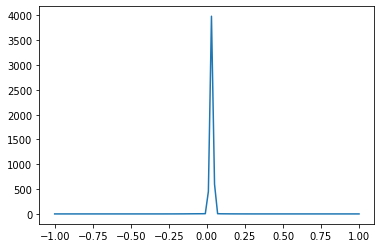

In [4]:
x = torch.linspace(-1, 1, 100)
y = [likelihood(x_i) for x_i in x]
plt.plot(x, y)

In [5]:
p = spike_and_slab.main()

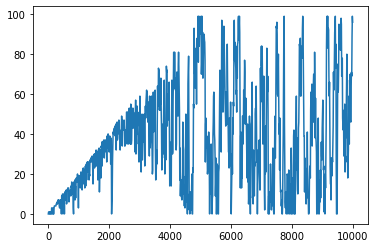

In [6]:
hist = p[1].get_history
y = torch.tensor(hist['j']).squeeze(-1)
x = torch.arange(len(y))
plt.plot(x[::10], y[::10])